<a href="https://colab.research.google.com/github/sandeeptuluri/Projects/blob/main/titanic_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sandeeptuluri/Linear-Regression/main/titanic%20train%20.csv')

In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
sns.set_style('whitegrid')

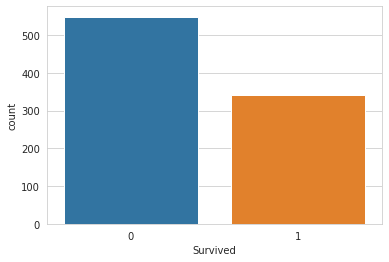

In [ ]:
sns.countplot(data=df, x='Survived')

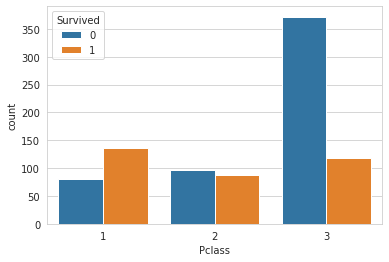

In [ ]:
sns.countplot(x='Pclass',hue='Survived',data=df)

In [ ]:
type(df['Age'])

pandas.core.series.Series

<Figure size 864x576 with 0 Axes>

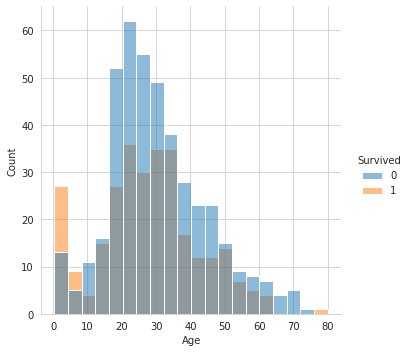

In [ ]:
plt.figure(figsize=(12,8))
sns.displot(df,x='Age',hue='Survived')

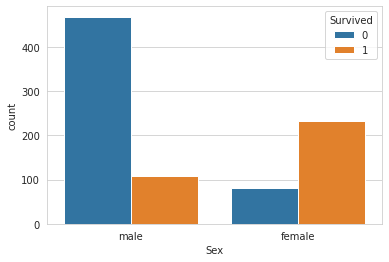

In [ ]:
sns.countplot(data=df,x='Sex',hue='Survived')

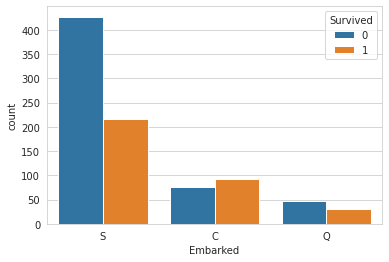

In [ ]:
sns.countplot(data=df,x='Embarked',hue='Survived')

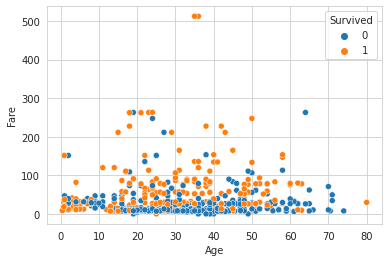

In [ ]:
sns.scatterplot(x='Age',y='Fare',hue='Survived',data=df)

In [ ]:
#feature engineering

In [ ]:
df.drop('Cabin',axis=1,inplace=True)

In [ ]:
df['Embarked'].fillna('S',inplace=True)

In [ ]:
df.Embarked.isnull().sum()

0

In [ ]:
df.corr()['Age']

PassengerId    0.036847
Survived      -0.077221
Pclass        -0.369226
Age            1.000000
SibSp         -0.308247
Parch         -0.189119
Fare           0.096067
Name: Age, dtype: float64

In [ ]:
h = (df.groupby('Sex')['Age'].mean())
h

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [ ]:
df.loc[(df['Age'].isnull()) & ((df['Pclass'] == 1) & (df['Sex'] == 'male')), 'Age'] = df[(df['Pclass'] == 1) & (df['Sex'] == 'male')]['Age'].mean()
df.loc[(df['Age'].isnull()) & ((df['Pclass'] == 2) & (df['Sex'] == 'male')), 'Age'] = df[(df['Pclass'] == 2) & (df['Sex'] == 'male')]['Age'].mean()
df.loc[(df['Age'].isnull()) & ((df['Pclass'] == 3) & (df['Sex'] == 'male')), 'Age'] = df[(df['Pclass'] == 3) & (df['Sex'] == 'male')]['Age'].mean()
df.loc[(df['Age'].isnull()) & ((df['Pclass'] == 1) & (df['Sex'] == 'female')), 'Age'] = df[(df['Pclass'] == 1) & (df['Sex'] == 'female')]['Age'].mean()
df.loc[(df['Age'].isnull()) & ((df['Pclass'] == 2) & (df['Sex'] == 'female')), 'Age'] = df[(df['Pclass'] == 2) & (df['Sex'] == 'female')]['Age'].mean()
df.loc[(df['Age'].isnull()) & ((df['Pclass'] == 3) & (df['Sex'] == 'female')), 'Age'] = df[(df['Pclass'] == 3) & (df['Sex'] == 'female')]['Age'].mean()

In [ ]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df['Title'] = df['Name'].str.split(", ", expand=True)[1].str.split(".",expand=True)[0]

In [ ]:
title_names = (df['Title'].value_counts() < 10)
df['Title'] = df['Title'].apply(lambda x: 'Others' if title_names.loc[x] == True else x)

In [ ]:
df['Title']

0          Mr
1         Mrs
2        Miss
3         Mrs
4          Mr
        ...  
886    Others
887      Miss
888      Miss
889        Mr
890        Mr
Name: Title, Length: 891, dtype: object

In [ ]:
df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,0,3,22.0,1,0,7.2500,1,0,1,0,1,0,0
1,1,1,38.0,1,0,71.2833,0,0,0,0,0,1,0
2,1,3,26.0,0,0,7.9250,0,0,1,1,0,0,0
3,1,1,35.0,1,0,53.1000,0,0,1,0,0,1,0
4,0,3,35.0,0,0,8.0500,1,0,1,0,1,0,0


In [ ]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [ ]:
X.shape

(891, 12)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
Xscale = scaler.fit_transform(X)

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(Xscale,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
log_acc = logmodel.score(Xscale,y)

In [ ]:
log_acc

0.835016835016835

In [ ]:
# logistic regression with train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

In [ ]:
test_logmodel = logmodel.fit(X_train_scale, y_train)

In [ ]:
predictions1 = test_logmodel.predict(X_test)

In [ ]:
predictions2 = test_logmodel.predict(X_test_scale)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions1))

              precision    recall  f1-score   support

           0       0.65      0.95      0.77       157
           1       0.78      0.26      0.39       111

    accuracy                           0.66       268
   macro avg       0.71      0.61      0.58       268
weighted avg       0.70      0.66      0.61       268



In [ ]:
print(classification_report(y_test,predictions2))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       157
           1       0.80      0.77      0.79       111

    accuracy                           0.83       268
   macro avg       0.82      0.82      0.82       268
weighted avg       0.83      0.83      0.83       268



In [ ]:
print(confusion_matrix(y_test, predictions2))

[[136  21]
 [ 25  86]]


In [ ]:
print(confusion_matrix(y_test, predictions1))

[[149   8]
 [ 82  29]]


In [ ]:
# view the test score of random forest

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier()
cv = KFold(n_splits=5, random_state=1, shuffle=True)
rfscore = cross_val_score(rf, X, y, cv=cv, n_jobs=-1)

In [ ]:
rfscore = np.mean(rfscore)
print(rfscore)

0.8070177641077144


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gboost = GradientBoostingClassifier(max_features='sqrt',learning_rate=0.01,
                                    max_depth=8, min_samples_leaf=3,
                                    min_samples_split=40,
                                    n_estimators=1000)
gboost.fit(X,y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=8,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=3, min_samples_split=40,
                           min_weight_fraction_leaf=0.0, n_estimators=1000,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gbscore = cross_val_score(gboost, X, y, cv=cv, n_jobs=-1,scoring='accuracy')
print(gbscore)

[0.77653631 0.80898876 0.8258427  0.87078652 0.87078652]


In [ ]:
d = {'Accuracy':[log_acc, rfscore, gbscore]}
index = ['Logistic Regression', 'Random Forest', 'Gradient Boosting']
results = pd.DataFrame(d)
results.index = index

results

,Accuracy
Logistic Regression,0.835017
Random Forest,0.807018
Gradient Boosting,"[0.776536312849162, 0.8089887640449438, 0.8258..."
